# Task: Building a Credit Approval Model using Neural Networks

In [1]:
# Importing the required packages
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

# Part 1: Jupyter Notebook 
# QUESTION1
# Data Preparation: Download the dataset, load it into a pandas data frame, and prepare it for analysis. Write the resulting pandas data frame to a csv file(yourAndrewId_project.csv).

In [2]:
# load and read the dataset
data=pd.read_csv("crx.data",header=None,delimiter=',')

# viewing the dataset
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
# Rename the columns
data.columns = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [4]:
# Replace the ? which is in the data by empty string.
new_data=data.replace({'?':''})
new_data


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [5]:
# Write the resulting pandas data frame to a csv file(yourAndrewId_project.csv).
new_data.to_csv("jeadedn_project.csv",index=False)


# QUESTION 2

# Exploratory Data Analysis (EDA): Use numpy, pandas, and matplotlib to perform EDA on the data. This should include identifying the presence of missing values (if any), creating visualizations with the data, and identifying presence of outliers (if any).

In [6]:
# Check the missing values
new_data_2=pd.read_csv("jeadedn_project.csv")
new_data_2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [7]:
# Check the information of the missing values
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [8]:
# Check the missing values
new_data_2.isna().sum()


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

<AxesSubplot:xlabel='A2'>

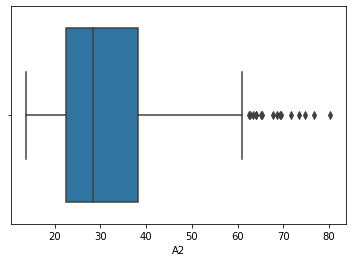

In [9]:
# Check the outliers
# For A2
sns.boxplot(x=new_data_2['A2'])


<AxesSubplot:xlabel='A3'>

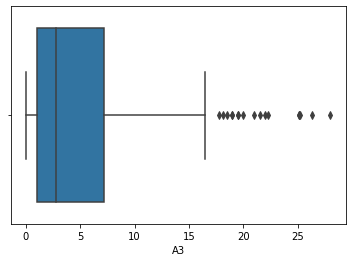

In [10]:
# Check the outliers
# For A3
sns.boxplot(x=new_data_2['A3'])

<AxesSubplot:xlabel='A8'>

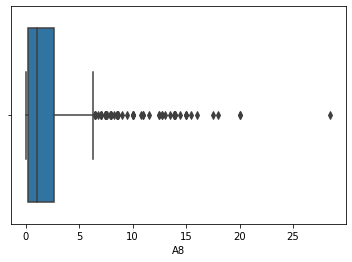

In [11]:
# Check the outliers
# For A8
sns.boxplot(x=new_data_2['A8'])

<AxesSubplot:xlabel='A11'>

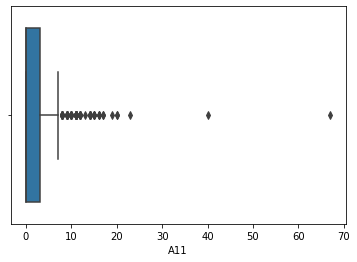

In [12]:
# Check the outliers
# For A11
sns.boxplot(x=new_data_2['A11'])

<AxesSubplot:xlabel='A14'>

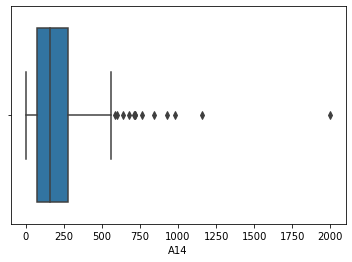

In [13]:
# Check the outliers
# For A14
sns.boxplot(x=new_data_2['A14'])

<AxesSubplot:xlabel='A15'>

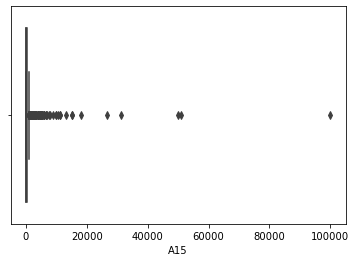

In [14]:
# Check the outliers
# For A15
sns.boxplot(x=new_data_2['A15'])

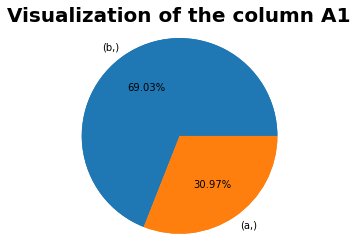

In [15]:
# creating visualizations with the data.

# Consider A1
# Creating plot
(new_data_2[['A1']].value_counts()).plot(kind='pie')
plt.pie(new_data_2[['A1']].value_counts(), autopct='%1.2f%%')
plt.ylabel('')

plt.title('Visualization of the column A1',fontweight="bold",fontsize = 20)
plt.axis('equal')

# show plot
plt.show()

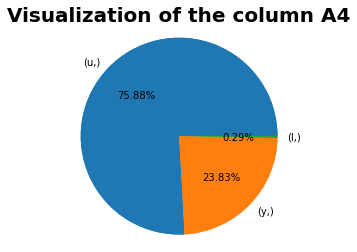

In [16]:
# For A4
# Consider A4
# creating visualizations with the data.

# Creating plot
(new_data_2[['A4']].value_counts()).plot(kind='pie')
plt.pie(new_data_2[['A4']].value_counts(), autopct='%1.2f%%')
plt.ylabel('')

plt.title('Visualization of the column A4',fontweight="bold",fontsize = 20)
plt.axis('equal')

# show plot
plt.show()

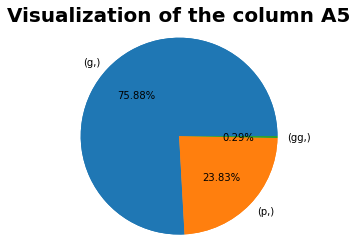

In [17]:
# creating visualizations with the data.

# Consider A5
# Creating plot
(new_data_2[['A5']].value_counts()).plot(kind='pie')
plt.pie(new_data_2[['A5']].value_counts(), autopct='%1.2f%%')
plt.ylabel('')

plt.title('Visualization of the column A5',fontweight="bold",fontsize = 20)
plt.axis('equal')

# show plot
plt.show()

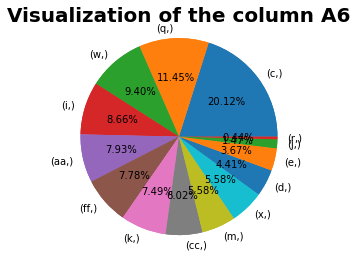

In [18]:
# creating visualizations with the data.

# Consider A6
# Creating plot
(new_data_2[['A6']].value_counts()).plot(kind='pie')
plt.pie(new_data_2[['A6']].value_counts(), autopct='%1.2f%%')
plt.ylabel('')

plt.title('Visualization of the column A6',fontweight="bold",fontsize = 20)
plt.axis('equal')

# show plot
plt.show()

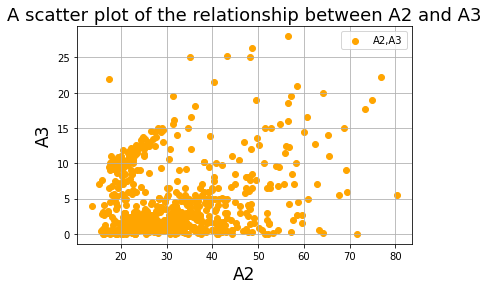

In [19]:
# scatter plot which shows the relationship between A2 and A3
plt.scatter(new_data_2['A2'],new_data_2['A3'],label="A2,A3",color="orange")
plt.xlabel('A2', size=17)
plt.ylabel('A3', size=17)
plt.title ('A scatter plot of the relationship between A2 and A3', size= 18)

# apply legend
plt.legend()

# show the graph
plt.grid()
plt.show()


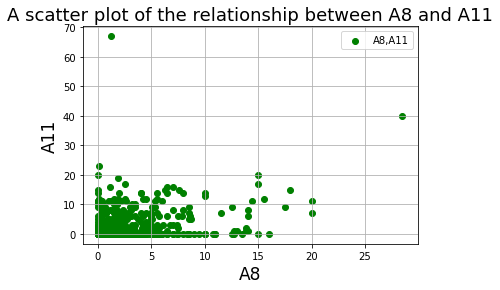

In [20]:
# scatter plot which shows the relationship between A8 and A11
plt.scatter(new_data_2['A8'],new_data_2['A11'],label="A8,A11",color="green")
plt.xlabel('A8', size=17)
plt.ylabel('A11', size=17)
plt.title ('A scatter plot of the relationship between A8 and A11', size= 18)

# apply legend
plt.legend()

# show the graph
plt.grid()
plt.show()

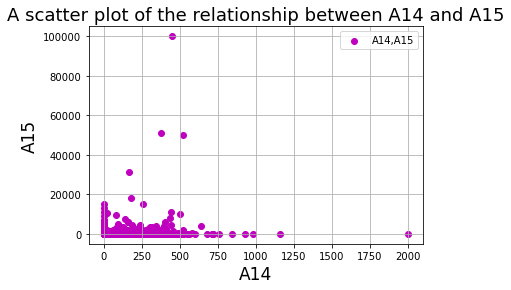

In [21]:
# scatter plot which shows the relationship between A14 and A15
plt.scatter(new_data_2['A14'],new_data_2['A15'],label="A14,A15",color="m")
plt.xlabel('A14', size=17)
plt.ylabel('A15', size=17)
plt.title ('A scatter plot of the relationship between A14 and A15', size= 18)

# apply legend
plt.legend()

# show the graph
plt.grid()
plt.show()


# QUESTION 3.Preprocessing, Feature Selection and Engineering: This should make your data ready for building machine learning models. Using pandas and scikit-learn:Preprocessing, Feature Selection and Engineering: This should make your data ready for building machine learning models. Using pandas and scikit-learn:

# a) Handle missing values and outliers (if any),

In [22]:
# Impute missing values with the privious value in the column.
# For A1
new_data_2['A1']=new_data_2['A1'].fillna(method='ffill')


In [23]:
# For A2
new_data_2['A2']=new_data_2['A2'].fillna(method='ffill')

In [24]:
# For A4
new_data_2['A4']=new_data_2['A4'].fillna(method='ffill')

In [25]:
# For A5
new_data_2['A5']=new_data_2['A5'].fillna(method='ffill')

In [26]:
# For A6
new_data_2['A6']=new_data_2['A6'].fillna(method='ffill')

In [27]:
# For A7
new_data_2['A7']=new_data_2['A7'].fillna(method='ffill')

In [28]:
# For A14
new_data_2['A14']=new_data_2['A14'].fillna(method='ffill')

In [29]:
# Recheck the missing values
new_data_2.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [30]:
# Handle outliers
threshold = 3
scores=new_data_2.filter(['A2','A3','A8','A11','A14','A15'])
z=np.abs(stats.zscore(scores))
new_data_3 =new_data_2[(z <3).all(axis=1)]
new_data_3


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# b) Perform appropriate label encoding (for categorical attributes) and data scaling (if needed).

In [31]:
# Replace the strings with numbers in the dataset
data_new_encoded=pd.get_dummies(data=new_data_3[['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16']],prefix=['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16'])
data_new_encoded

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,0,1,0,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
1,1,0,0,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
686,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,1,0,0,0,1
687,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
688,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [32]:
# concatenation
droped_data=new_data_3.drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16'],axis=1)
new_data_concat=pd.concat([droped_data,data_new_encoded],axis=1)
new_data_concat

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
686,22.67,0.750,2.00,2,200.0,394,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1
687,25.25,13.500,2.00,1,200.0,1,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1
688,17.92,0.205,0.04,0,280.0,750,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


# 4. Model creation and evaluation:

# a. Using scikit-learn, build a neural network-based model and perform evaluation using 10-fold cross validation. Your model should be multi-layer. Provide results using two performance metrics (of your choice). Justify the choice of metrics.

In [33]:
# selecting all columns excluding the last 2 columns // independent variables
x=new_data_concat.iloc[0:,:-2]
x

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,200.0,394,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,200.0,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,280.0,750,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [34]:
# selecting the last 2 columns  // dependent variabales or predicted variables
y=new_data_concat.drop(new_data_concat.iloc[0:,:-2],axis=1)
y

,A16_+,A16_-
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
685,0,1
686,0,1
687,0,1
688,0,1


In [35]:
# splitting the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [36]:
X_train

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
417,23.58,1.790,0.540,0,136.0,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
388,26.67,14.585,0.000,0,178.0,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
190,21.33,10.500,3.000,0,0.0,0,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0
484,34.67,1.080,1.165,0,28.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
268,59.67,1.540,0.125,0,260.0,0,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36.33,2.125,0.085,1,50.0,1187,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
651,15.83,7.625,0.125,1,0.0,160,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
3,27.83,1.540,3.750,5,100.0,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
98,22.50,11.000,3.000,0,268.0,0,1,0,0,0,...,0,0,1,1,0,0,1,1,0,0


In [37]:
X_test

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
421,20.42,1.085,1.500,0,108.0,7,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
425,24.58,1.250,0.250,0,110.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
659,28.58,3.750,0.250,1,40.0,154,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
583,32.67,9.000,5.250,0,154.0,0,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
428,49.17,2.290,0.290,0,200.0,3,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,56.50,16.000,0.000,15,0.0,247,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
332,34.08,2.500,1.000,0,460.0,16,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
343,33.75,2.750,0.000,0,180.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
547,23.92,1.500,1.875,6,200.0,327,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0


In [38]:
y_train

,A16_+,A16_-
417,0,1
388,0,1
190,1,0
484,0,1
268,1,0
...,...,...
204,1,0
651,0,1
3,1,0
98,0,1


In [39]:
y_test

,A16_+,A16_-
421,0,1
425,0,1
659,0,1
583,1,0
428,0,1
...,...,...
141,1,0
332,0,1
343,0,1
547,1,0


In [40]:
# Fitting the dataset

# initialize the class
classifier = MLPClassifier(random_state=1, max_iter=50)

# fitting the model
classifier.fit(y_train,y_train)

MLPClassifier(max_iter=50, random_state=1)

In [41]:
# Use the accuracy and precision

# accuracy
accuracy_scores=cross_val_score(classifier,x,y,cv=10,scoring='accuracy')
accuracy_scores.mean()


0.6943204365079365

In [42]:
# precision
precision_scores=cross_val_score(classifier,x,y,cv=10,scoring='precision_weighted')
precision_scores.mean()

0.8935782089381004

# b. Using hyperparameter tuning (with Grid Search), and based on 10-fold crossvalidation, identify the combination of hyperparameters that gives the best estimator on the dataset. Your search space for hyperparameters must include at least three hyperparameters - selected from learning rate, epochs, activation function, optimizer, batch-size, among others.

In [43]:
search_space = {
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd','adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}


In [44]:
classifier_tuned = MLPClassifier(random_state=1, max_iter=50)

In [45]:
#Create a GridSearch object
# metric: accuracy
grid_search=GridSearchCV(classifier_tuned,search_space,cv=10, n_jobs=1,verbose=2,scoring='accuracy')

In [46]:
# fitting the model using grid search
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; t

[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activat

[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=re

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=50, random_state=1),
             n_jobs=1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=2)

In [47]:
grid_search.best_score_

0.7134308510638298

In [48]:
#Create a GridSearch object
# metric: precision
grid_search_new=GridSearchCV(classifier_tuned,search_space,cv=10, n_jobs=1,verbose=2,scoring='precision_weighted')

In [49]:
# fitting the model using grid search
grid_search_new.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; t

[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activat

[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=re

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=50, random_state=1),
             n_jobs=1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='precision_weighted', verbose=2)

In [50]:
grid_search_new.best_score_

0.7754723388644148

# c) Compare the performance of the tuned model in b) against that in the model in a). Use visualizations to highlight the comparison.

In [51]:
# Compare accuracy and precision before tuning and aftrer tuning the model using the visualization
accuracy={"Before Tuning":accuracy_scores.mean(),"After Tuning":grid_search.best_score_}
precision={"Before Tuning":precision_scores.mean(),"After Tuning":grid_search_new.best_score_}


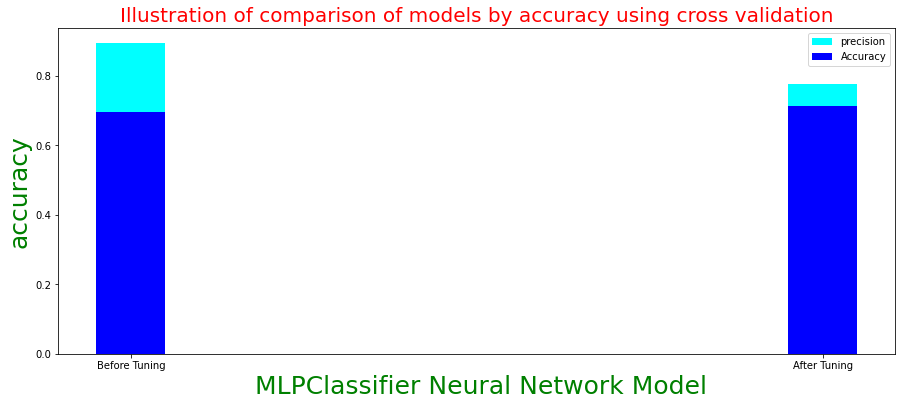

In [52]:
#plotting the graph 
rcParams['figure.figsize']=15,6
plt.bar(list(precision.keys()),list(precision.values()),width=0.1,color='cyan',label='precision')
plt.bar(list(accuracy.keys()),list(accuracy.values()),width=0.1,color='blue',label='Accuracy')

plt.xlabel(" MLPClassifier Neural Network Model",color='green',size=25)
plt.ylabel("accuracy",color='green',size=25)
plt.title("Illustration of comparison of models by accuracy using cross validation",color='red',size=20)
plt.legend()
plt.show()
